In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.2          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "facebook_combined.txt"

# Question 1


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




Number of edges in the graph: 88234
Number of nodes (vertices) in the graph: 4039
Is the graph connected? TRUE


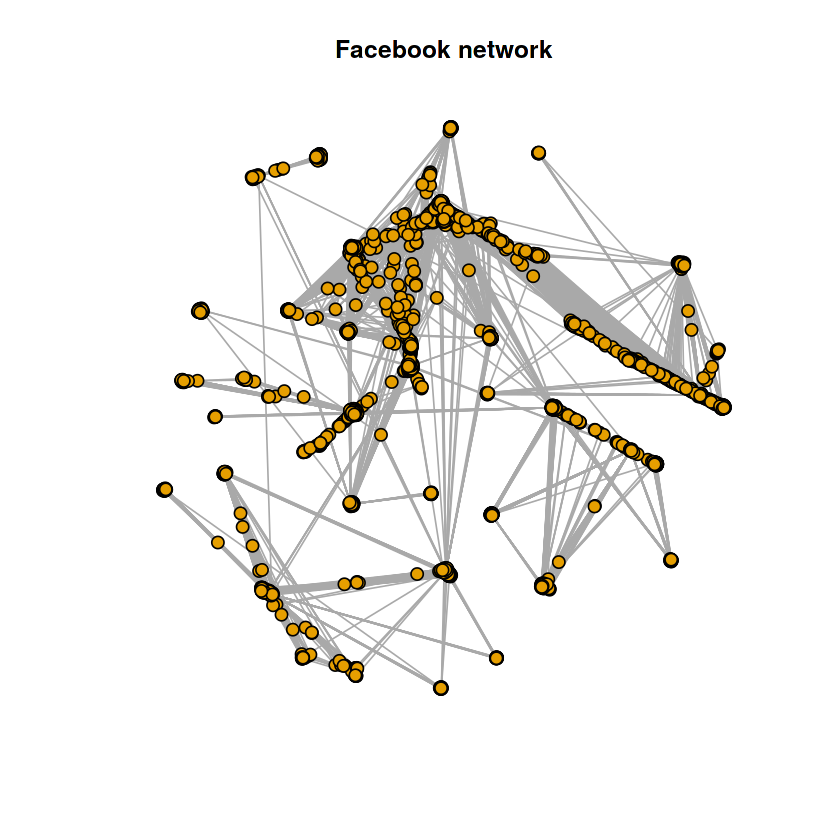

In [2]:
library('igraph')


facebook_txt <- read_graph("../input/facebook_combined.txt", directed = FALSE)
facebook_edge <- as_edgelist(facebook_txt)
g <- graph_from_edgelist(facebook_edge, directed = FALSE)
plot(g, edge.arrow.size=.2, vertex.size=4, vertex.label=NA, main="Facebook network")

#question 1.1
cat(paste('Number of edges in the graph: ', gsize(g), '\n', sep=''))
cat(paste('Number of nodes (vertices) in the graph: ', gorder(g), '\n', sep=''))

#question 1.2
cat(paste('Is the graph connected? ', is.connected(g), '\n', sep=''))


# Question 2

In [3]:
#diameter of network
cat(paste('Diameter of network: ', diameter(g), '\n', sep=''))


Diameter of network: 8


# Question 3

Average network degree:  43.6910126268878

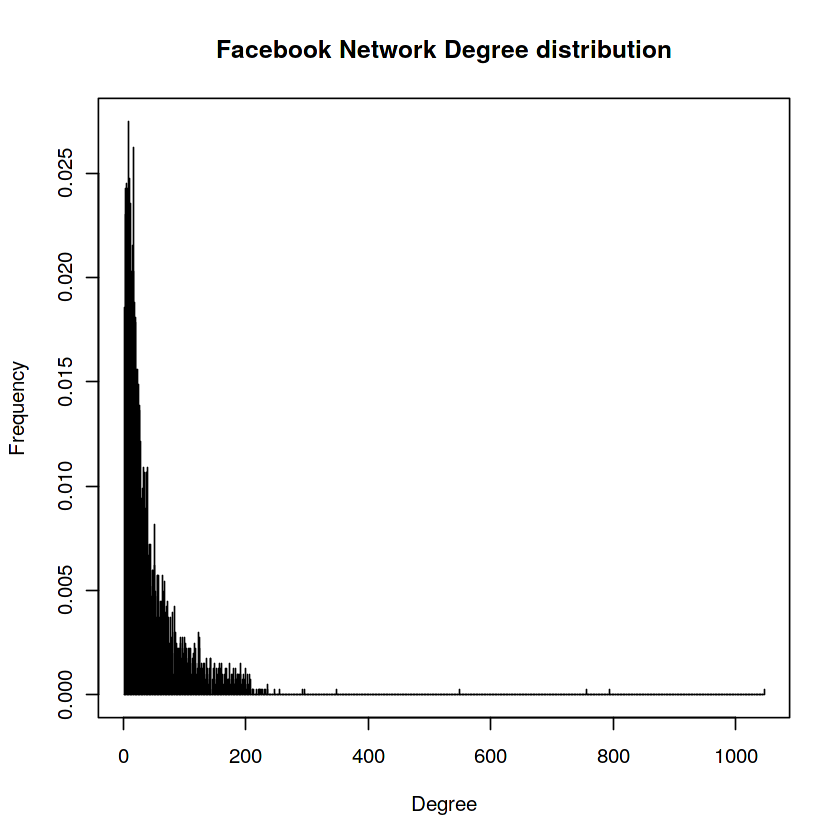

In [4]:
deg <- degree_distribution(g)

plot(deg, type="h", xlab = "Degree", ylab = "Frequency", main = 'Facebook Network Degree distribution')
cat(paste("Average network degree: ", mean(degree(g))))

# Question 4


Call:
lm(formula = deg_log ~ log_x)

Coefficients:
(Intercept)        log_x  
    -0.6611      -1.2475  


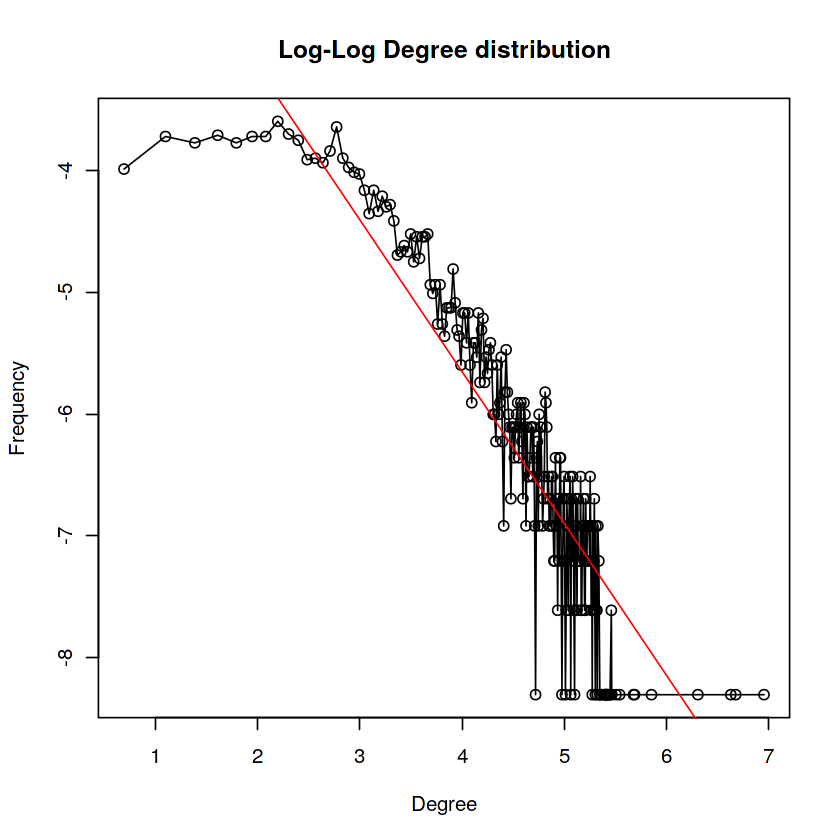

In [5]:
#x values
log_x <- log(c(1:length(deg)))
#y values
deg_log <- log(deg)

#adjust for log +/- infinity issues
log_x <- log_x[-which(is.infinite(deg_log))]
deg_log <- deg_log[-which(is.infinite(deg_log))]

plot(log_x, deg_log, type="o", xlab = "Degree", ylab = "Frequency", main = "Log-Log Degree distribution")

lm(deg_log ~ log_x)
abline(lm(deg_log ~ log_x), col='red')
